In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import rnnInput as inp
import bioinfoInput as bioinp
import lstmcnv as cnv
from matplotlib import pyplot as plt
import time as t

#parametros da rede
TIMESTEPS = 50
RNN_LAYERS = [{'num_units': 300}]
TRAINING_STEPS = 5000
DENSE_LAYERS = None
#DENSE_LAYERS = [120,120]
LOG_DIR = './logs/tcnv'
BATCH_SIZE = 100

#configuraçõess d gpu
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.4)
config = tf.ConfigProto()
config.allow_soft_placement=True
config.log_device_placement=True
tf.logging.set_verbosity(tf.logging.ERROR)
sess = tf.Session(config=config)

#parametros da amostra
length=2271
maxSec=300

C:\Users\freak\tensorflow\Final\bioinfoInput.py:9: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  import pandas.rpy.common as com


In [2]:
#carrega o cnv do arquivo
orig_train_x,orig_train_y=inp.getPairfromCSV2('train1.csv')
orig_test_x,orig_test_y=inp.getPairfromCSV2('test1.csv')
orig_valid_x,orig_valid_y=inp.getPairfromCSV2('valid1.csv')


In [ ]:
(orig_train_x,orig_train_y),(orig_test_x,orig_test_y),(orig_valid_x,orig_valid_y) = bioinp.retCNV2(length,maxSec)
inp.setPairCtoCSV(orig_train_x,orig_train_y,"train1.csv")
inp.setPairCtoCSV(orig_test_x,orig_test_y,"test1.csv")
inp.setPairCtoCSV(orig_valid_x,orig_valid_y,"valid1.csv")


In [3]:
#inicializacao do regressor com os dados da rede
regressor=cnv.iniciaRede(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS,LOG_DIR)
cnv.treinaRede(orig_valid_x,orig_valid_y,orig_train_x,orig_train_y,regressor,1,TIMESTEPS,BATCH_SIZE)



C:\Users\freak\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


tempo total do treinamento:  77.09379839897156


C:\Users\freak\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


acertos 9 fn 11 ,fp 10


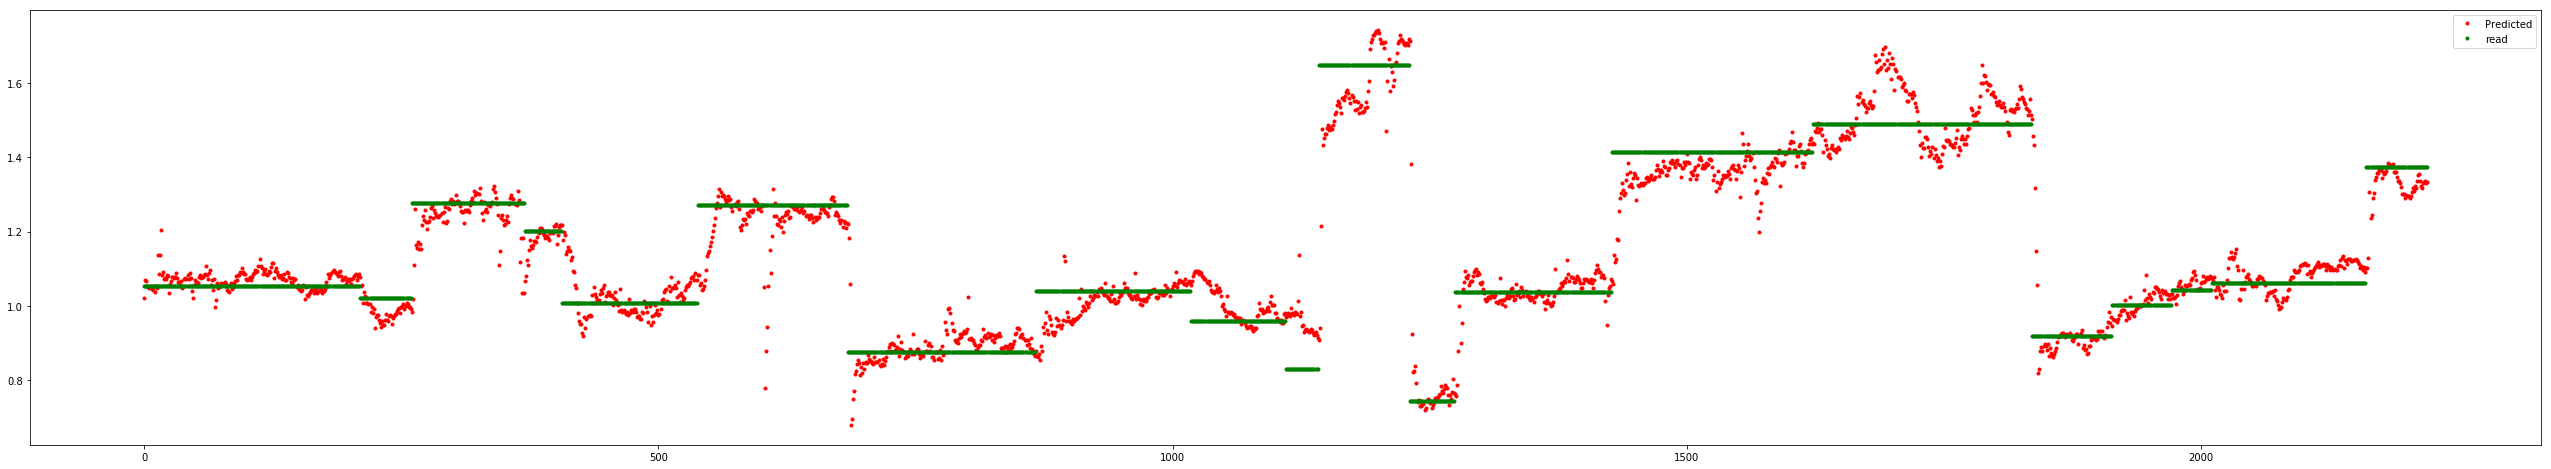

In [21]:
#predict
testX = inp.rnn_data(orig_test_x,TIMESTEPS)
predicted = regressor.predict(testX)
predictedArr = np.array(list(predicted))
predictedDataFrame=pd.DataFrame(predictedArr)

#plot
origArr = np.array(list(orig_test_y['A0Y']))
origArr.shape = -1,1
origArr=origArr[TIMESTEPS:]
plt.figure(figsize=(45,8))
plt.plot(predictedDataFrame[0], label='Predicted', marker='.', linestyle='none', color='r')
plt.plot(origArr, label='read', marker='.', linestyle='none', color='g')
plt.legend()

#teste individual
segmentado=bioinp.segmenta(predictedDataFrame[0],10,0.023)
origArr = np.array(list(orig_test_y['A0Y']))
origArr.shape = -1,1
origArr=origArr[TIMESTEPS:]
arrayDeslocado=np.array(list(origArr))

orig=bioinp.trechos(arrayDeslocado,tresh=5)
teste=bioinp.trechos(segmentado,tresh=5)

acertos,false_negative = bioinp.qtdErros (orig,teste)
_,false_positive = bioinp.qtdErros (teste,orig)
print('acertos {} fn {} ,fp {}'.format(acertos,false_positive,false_negative))

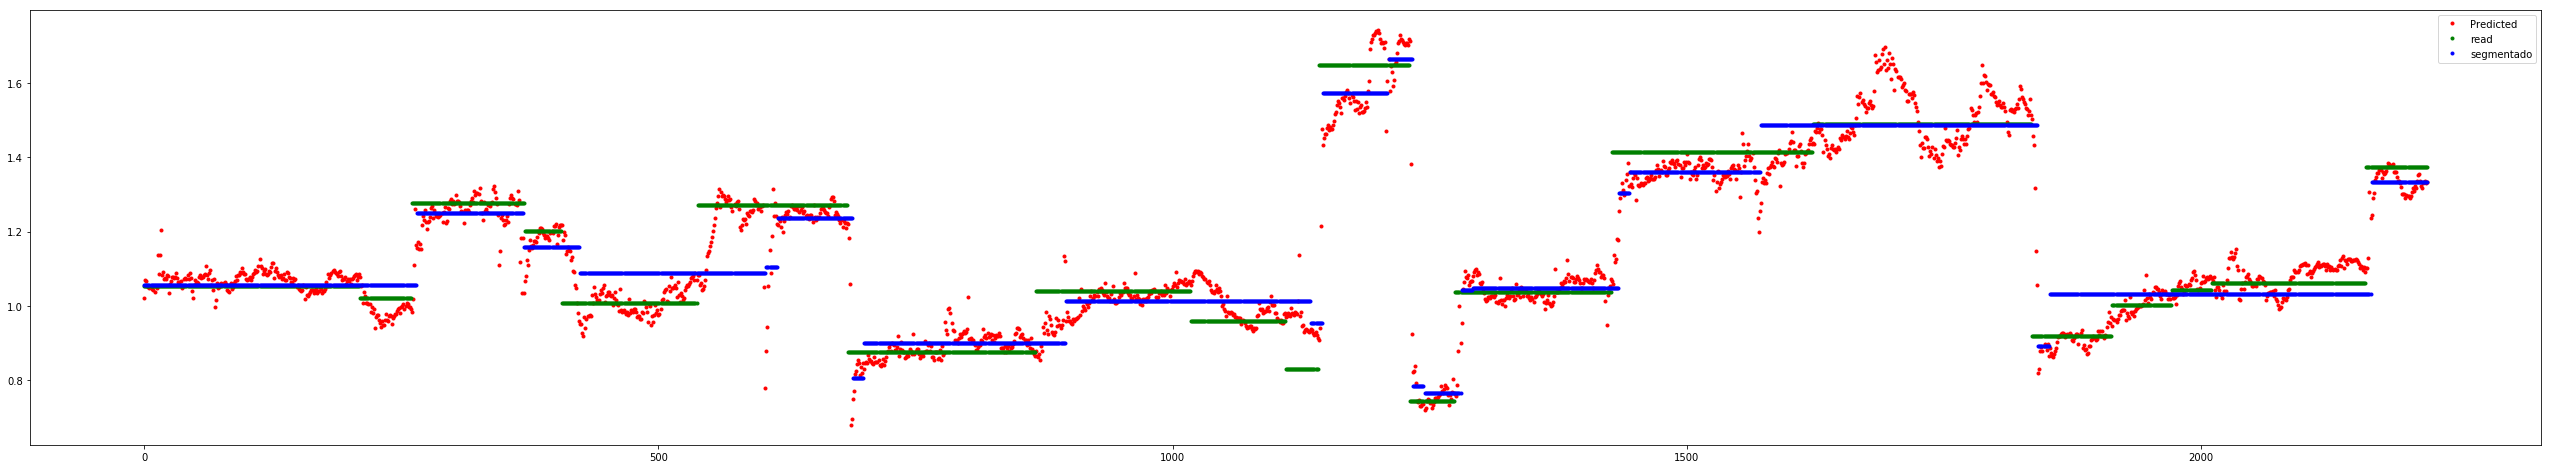

In [22]:
#plot segmentacao
plt.figure(figsize=(45,8))
plt.plot(predictedDataFrame[0], label='Predicted', marker='.', linestyle='none', color='r')
plt.plot(origArr, label='read', marker='.', linestyle='none', color='g')
plt.plot(segmentado,label='segmentado', marker='.', linestyle='none', color='b')
plt.legend()

In [23]:
sctcnv,scdnacopy=bioinp.comparaSeg(length,maxSec,TIMESTEPS,regressor,qtd=50)

C:\Users\freak\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


In [31]:
print(np.median(sctcnv['score']))
sctcnv

0.5669642857142858


,tp,fp,fn,ppv,sn,score
0,9,10,7,0.473684,0.5625,0.514286
1,9,11,2,0.45,0.818182,0.580645
2,13,5,3,0.722222,0.8125,0.764706
3,7,1,5,0.875,0.583333,0.7
4,6,5,5,0.545455,0.545455,0.545455
5,4,7,10,0.363636,0.285714,0.32
6,7,3,7,0.7,0.5,0.583333
7,8,2,5,0.8,0.615385,0.695652
8,13,6,2,0.684211,0.866667,0.764706
9,7,10,5,0.411765,0.583333,0.482759


In [32]:
print(np.median(scdnacopy['score']))
scdnacopy

0.5


,tp,fp,fn,ppv,sn,score
0,13,17,3,0.433333,0.8125,0.565217
1,11,18,0,0.37931,1,0.55
2,15,18,1,0.454545,0.9375,0.612245
3,8,21,4,0.275862,0.666667,0.390244
4,10,19,1,0.344828,0.909091,0.5
5,8,19,6,0.296296,0.571429,0.390244
6,11,20,3,0.354839,0.785714,0.488889
7,10,15,3,0.4,0.769231,0.526316
8,15,17,0,0.46875,1,0.638298
9,9,21,3,0.3,0.75,0.428571


In [20]:
#reforco ed treinamento

import time as t
tempoInicial = t.time()
tempot = tempoInicial
for i in range(80):
    print('Treinamento nr:',i)
    data_train2, y_train2=bioinp.dataFitCNV(length,maxSec,TIMESTEPS,regressor,BATCH_SIZE,TRAINING_STEPS)
    tempoTrain = t.time() - tempot
    tempot = t.time()
    print("tempo do treinamento: ",tempoTrain)
    #data_trainI, y_trainI=dataFitInv()
tempoTotal = t.time() - tempoInicial
print("tempo total do treinamento: ",tempoTotal)

Treinamento nr: 0


C:\Users\freak\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


tempo do treinamento:  384.93177318573
Treinamento nr: 1
tempo do treinamento:  408.93561458587646
Treinamento nr: 2
tempo do treinamento:  411.0009934902191
Treinamento nr: 3
tempo do treinamento:  403.3752770423889
Treinamento nr: 4
tempo do treinamento:  421.7007894515991
Treinamento nr: 5
tempo do treinamento:  374.59385323524475
Treinamento nr: 6
tempo do treinamento:  345.18835186958313
Treinamento nr: 7
tempo do treinamento:  344.45399379730225
Treinamento nr: 8
tempo do treinamento:  342.9695496559143
Treinamento nr: 9
tempo do treinamento:  343.96968507766724
Treinamento nr: 10
tempo do treinamento:  347.21956038475037
Treinamento nr: 11
tempo do treinamento:  348.610319852829
Treinamento nr: 12
tempo do treinamento:  343.375864982605
Treinamento nr: 13
tempo do treinamento:  343.1726756095886
Treinamento nr: 14
tempo do treinamento:  343.53218054771423
Treinamento nr: 15
tempo do treinamento:  343.7039957046509
Treinamento nr: 16
tempo do treinamento:  343.8602395057678
Trein

In [12]:
#teste individual com o dnacopy
origArr = np.array(list(orig_test_y['A0Y']))
origArr.shape = -1,1
origArr=origArr[TIMESTEPS:]
arrayDeslocado=np.array(list(origArr))

entraDNAcopy=np.log2(orig_test_x['A1X']/orig_test_x['A0X'])
segmentadoR=bioinp.DNAcopy(entraDNAcopy)

acertos,false_positive,false_negative = bioinp.pontosDNAcopy(segmentadoR,arrayDeslocado)
print('acertos {} fn {} ,fp {}'.format(acertos,false_positive,false_negative))


acertos 14 fn 16 ,fp 5


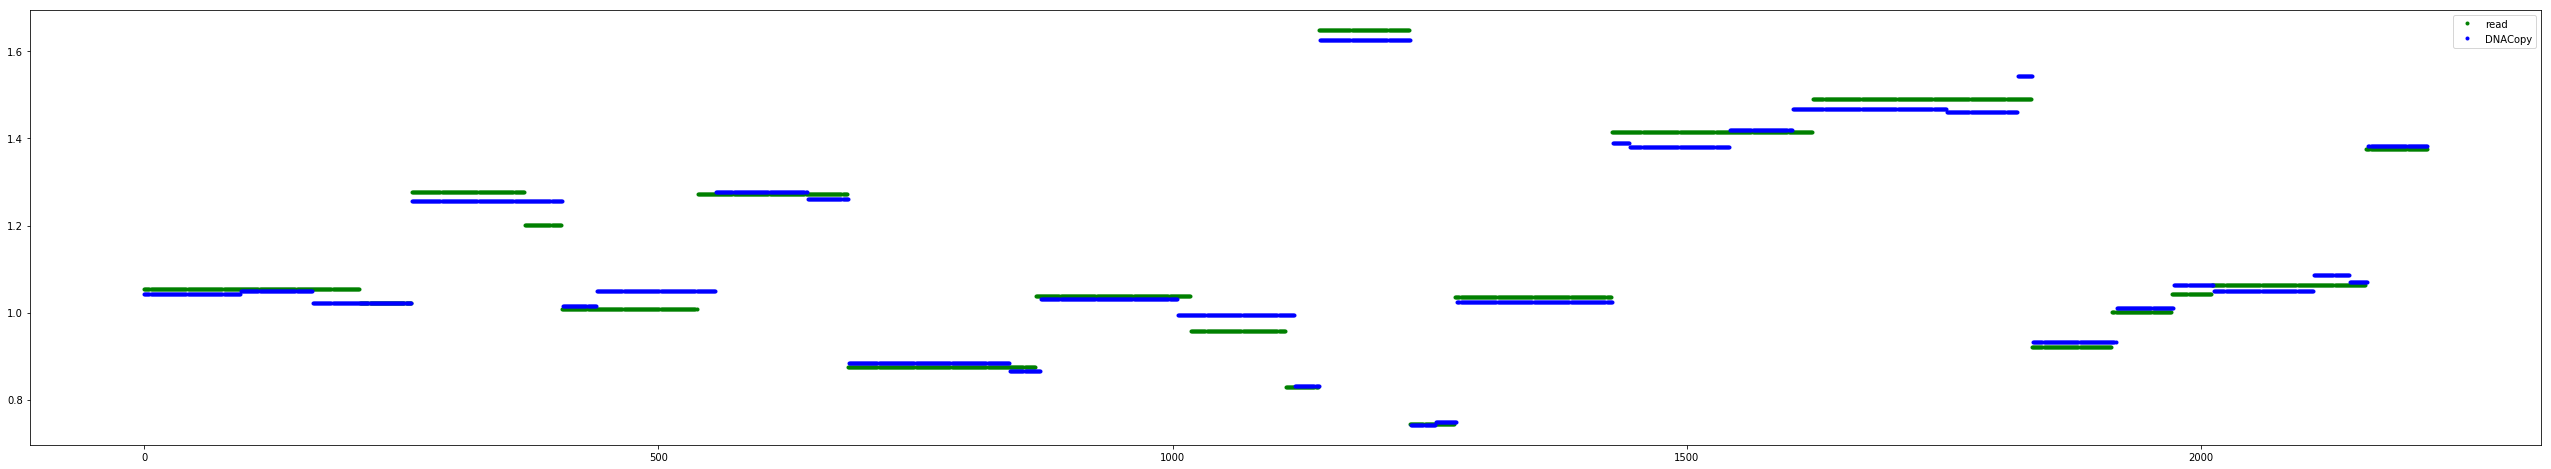

In [7]:
arrayOrig=arrayDeslocado
fimsetores = np.array(list(segmentadoR[2][1]))
medias = np.array(list(segmentadoR[1][5]))
med,loc=bioinp.segmentaDNAcopy(fimsetores,medias)
med = med[loc.size-arrayOrig.size:]
plt.figure(figsize=(45,8))
#plt.plot(predictedDataFrame[0], label='Predicted', marker='.', linestyle='none', color='r')
plt.plot(origArr, label='read', marker='.', linestyle='none', color='g')
plt.plot(med,label='DNACopy', marker='.', linestyle='none', color='b')
plt.legend()